In [1]:
from datetime import timedelta, date

def date_range(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

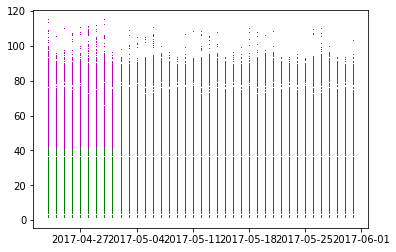

In [2]:
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline



def split_out_id(df: pd.DataFrame) -> pd.DataFrame:
    """Returns df with an additional column of type DateTime read from the id column."""
    df['visit_date'] = pd.to_datetime(df['id'].map(lambda x: str(x).split('_')[2]))
    df['air_store_id'] = df['id'].map(lambda x: '_'.join(x.split('_')[:2]))
    return df

lgb = split_out_id(pd.read_csv("LGB_sub.csv"))
lgb_cv = split_out_id(pd.read_csv("LGB_CV_sub.csv"))

date_info = pd.read_csv("data/date_info.csv", parse_dates=["calendar_date"])

plt.plot(lgb["visit_date"], lgb["visitors"], "g,", lgb_cv["visit_date"], lgb_cv["visitors"], "m,")

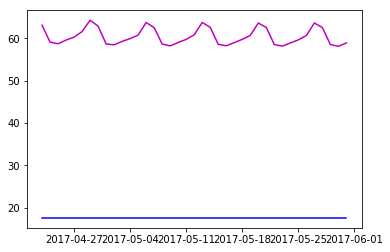

In [3]:
avg = lgb.groupby("visit_date").mean()
avg_cv = lgb_cv.groupby("visit_date").mean()
plt.plot(avg.index, avg["visitors"], "b-", avg_cv.index, avg_cv["visitors"], "m-")

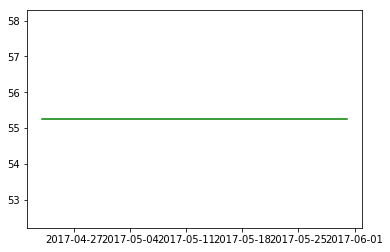

In [4]:
maxes = lgb.groupby("visit_date").max()
plt.plot(maxes.index, maxes["visitors"], "g-")

Plotting by store and date rather than id column

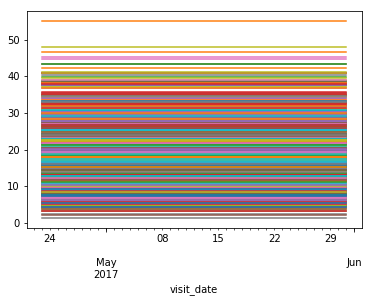

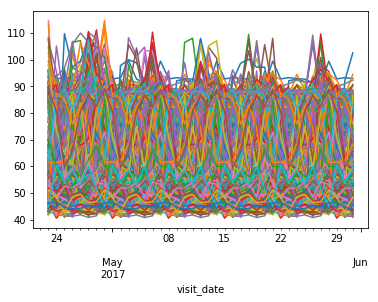

In [5]:
# Create pandas dataframe with index date columns air_store_id values visitors
stores = lgb.pivot_table(values="visitors", index="visit_date", columns="air_store_id", aggfunc="first")
non_cv = stores.plot()
non_cv.legend().set_visible(False)

stores_cv = lgb_cv.pivot_table(values="visitors", index="visit_date", columns="air_store_id", aggfunc="first")
cv = stores_cv.plot()
cv.legend().set_visible(False)

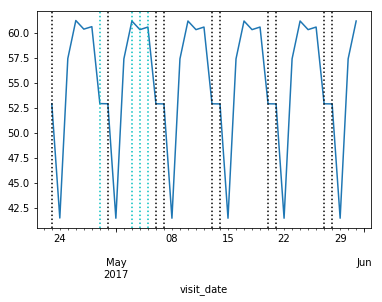

In [6]:
def graph_one_store(df, id: str) -> mplt.axes.Axes:
    graph = df[id].plot()
    lines = [linedate
             for linedate
             in date_range(stores_cv.index.min(), stores_cv.index.max() + timedelta(1))
             if date_info[date_info["calendar_date"] == linedate]["holiday_flg"].iloc[0]
             or date_info[date_info["calendar_date"] == linedate]["day_of_week"].iloc[0] in ("Saturday","Sunday")]
    [graph.axvline(x=date, color=('c' 
                                  if date_info[date_info["calendar_date"] == date]["holiday_flg"].iloc[0]
                                  else 'k'), linestyle=':') for date in lines]
    
graph_one_store(stores_cv, "air_06f95ac5c33aca10")

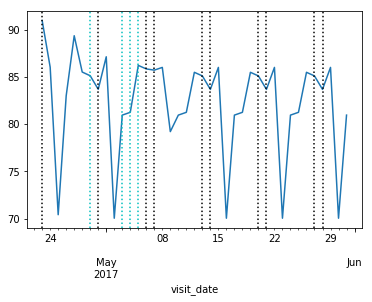

In [7]:
graph_one_store(stores_cv, "air_56cebcbd6906e04c")

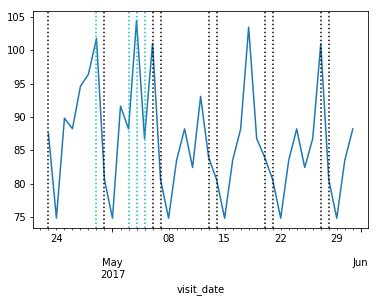

In [8]:
graph_one_store(stores_cv, "air_e55abd740f93ecc4")

Examining outlier store from non-cv in cv

In [9]:
print(','.join(lgb.groupby("visit_date").max()["air_store_id"].unique()))

air_fff68b929994bfbd


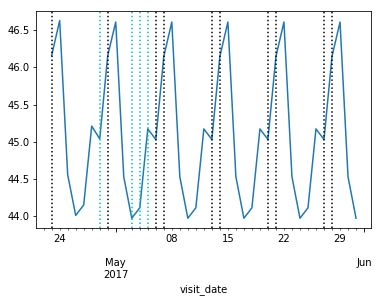

In [10]:
graph_one_store(stores_cv, "air_fff68b929994bfbd")

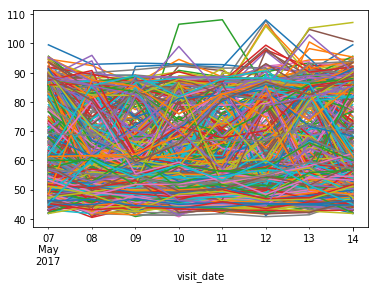

In [23]:
two_weeks = stores_cv[pd.Timestamp("2017-05-07") <= stores_cv.index]
two_weeks = two_weeks[two_weeks.index<=pd.Timestamp("2017-05-14")]
two_weeks.plot().legend().set_visible(False)